In [2]:
import pandas as pd

In [3]:
df =  pd.read_csv("results.csv")

In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df = df[(df["date"] >= "2019-01-01")].reset_index(drop=True)

In [6]:
df.sort_values("date").tail()
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2019-01-02,Oman,Thailand,2.0,0.0,Friendly,Abu Dhabi,United Arab Emirates,True
1,2019-01-05,United Arab Emirates,Bahrain,1.0,1.0,AFC Asian Cup,Abu Dhabi,United Arab Emirates,False
2,2019-01-06,Thailand,India,1.0,4.0,AFC Asian Cup,Abu Dhabi,United Arab Emirates,True
3,2019-01-06,Australia,Jordan,0.0,1.0,AFC Asian Cup,Al Ain,United Arab Emirates,True
4,2019-01-06,Syria,Palestine,0.0,0.0,AFC Asian Cup,Sharjah,United Arab Emirates,True
...,...,...,...,...,...,...,...,...,...
3430,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True
3431,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
3432,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
3433,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True


In [7]:
rank = pd.read_csv("fifa_ranking-2022-10-06.csv")

In [8]:
rank = rank[rank['rank'] <100]

In [64]:
rank.sample(frac=1).head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
34791,2020-12-23,51.0,Costa Rica,CRC,1427.00,1427.00,0.0,CONCACAF
39795,2019-05-09,48.0,Czech Republic,CZE,1424.00,1435.00,4.0,UEFA
20649,2019-05-02,58.0,Burkina Faso,BFA,1380.00,1371.00,-4.0,CAF
51551,2019-12-10,58.0,Finland,FIN,1386.00,1395.00,3.0,UEFA
31969,2021-06-03,94.0,Congo,CGO,1255.88,1255.88,0.0,CAF


In [9]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)

In [10]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [11]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [12]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [13]:
df_wc_ranked[(df_wc_ranked.home_team == "Brazil") | (df_wc_ranked.away_team == "Brazil")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
1001,2021-11-11,Brazil,Colombia,1.0,0.0,FIFA World Cup qualification,São Paulo,Brazil,False,1820.36,1811.73,2.0,0.0,1618.76,1618.40,16.0,0.0
1050,2021-11-16,Argentina,Brazil,0.0,0.0,FIFA World Cup qualification,San Juan,Argentina,False,1738.79,1725.31,6.0,0.0,1820.36,1811.73,2.0,0.0
1110,2022-01-27,Ecuador,Brazil,1.0,1.0,FIFA World Cup qualification,Quito,Ecuador,False,1448.27,1448.74,46.0,0.0,1826.35,1826.35,2.0,0.0
1131,2022-02-01,Brazil,Paraguay,4.0,0.0,FIFA World Cup qualification,Belo Horizonte,Brazil,False,1826.35,1826.35,2.0,0.0,1454.52,1454.52,43.0,0.0
1152,2022-03-24,Brazil,Chile,4.0,0.0,FIFA World Cup qualification,Rio de Janeiro,Brazil,False,1823.42,1826.35,2.0,0.0,1543.16,1543.42,26.0,2.0
1199,2022-03-29,Bolivia,Brazil,0.0,4.0,FIFA World Cup qualification,La Paz,Bolivia,False,1308.12,1324.21,76.0,-1.0,1823.42,1826.35,2.0,0.0
1243,2022-06-02,South Korea,Brazil,1.0,5.0,Friendly,Seoul,South Korea,False,1519.54,1522.85,29.0,0.0,1832.69,1823.42,1.0,-1.0
1273,2022-06-06,Japan,Brazil,0.0,1.0,Friendly,Tokyo,Japan,False,1553.44,1549.82,23.0,0.0,1832.69,1823.42,1.0,-1.0
1340,2022-09-23,Brazil,Ghana,3.0,0.0,Friendly,Le Havre,France,True,1837.56,1837.56,1.0,0.0,1393.47,1389.68,60.0,0.0
1380,2022-09-27,Brazil,Tunisia,5.0,1.0,Friendly,Paris,France,True,1837.56,1837.56,1.0,0.0,1507.86,1507.86,30.0,0.0


In [14]:
df = df_wc_ranked
# df=df[df['tournament'] != 'Friendly']



def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)
df[["result", "home_team_points", "away_team_points"]] = results


df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points
0,2019-01-06,Syria,Palestine,0.0,0.0,AFC Asian Cup,Sharjah,United Arab Emirates,True,1322.00,1322.00,74.0,0.0,1236.00,1236.00,99.0,0.0,2,1,1
1,2019-01-08,Finland,Sweden,1.0,0.0,Friendly,Doha,Qatar,True,1378.00,1378.00,58.0,0.0,1560.00,1560.00,14.0,0.0,0,3,0
2,2019-01-09,Qatar,Lebanon,2.0,0.0,AFC Asian Cup,Al Ain,United Arab Emirates,True,1258.00,1258.00,93.0,0.0,1296.00,1296.00,81.0,0.0,0,3,0
3,2019-01-09,Uzbekistan,Oman,2.0,1.0,AFC Asian Cup,Sharjah,United Arab Emirates,True,1251.00,1251.00,95.0,0.0,1295.00,1291.00,82.0,-1.0,0,3,0
4,2019-01-11,Estonia,Finland,2.0,1.0,Friendly,Doha,Qatar,True,1242.00,1242.00,96.0,0.0,1378.00,1378.00,58.0,0.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2022-09-27,Ukraine,Scotland,0.0,0.0,UEFA Nations League,Kraków,Poland,True,1542.79,1542.79,27.0,0.0,1462.96,1462.96,45.0,0.0,2,1,1
1396,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,1361.81,1361.81,66.0,0.0,1379.61,1379.61,63.0,0.0,2,1,1
1397,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,1488.57,1488.57,36.0,0.0,1549.53,1549.53,25.0,0.0,1,0,3
1398,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,1563.44,1563.44,20.0,0.0,1372.48,1372.48,65.0,0.0,2,1,1


In [15]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [16]:
home_teams = df[['home_team','rank_home','away_team','rank_away','home_score','away_score']]
home_teams.columns = ['curr_team','rank_curr','opp_team','rank_opp','curr_score','opp_score']

away_teams = df[['away_team','rank_away','home_team','rank_home','away_score','home_score']]
away_teams.columns = ['curr_team','rank_curr','opp_team','rank_opp','curr_score','opp_score']

all_teams = home_teams.append(away_teams)

<ipython-input-16-1eb84934c243>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_teams = home_teams.append(away_teams)


In [17]:
import numpy as np
all_teams['rank_curr_group'] = np.ceil(all_teams['rank_curr'].astype(int)/15)
all_teams['rank_opp_group'] = np.ceil(all_teams['rank_opp'].astype(int)/15)
team_vs_rank = all_teams.groupby(['curr_team','rank_opp_group']).mean()[['curr_score','opp_score']].reset_index()
team_vs_rank = team_vs_rank[team_vs_rank['rank_opp_group'] <10]
team_vs_rank[team_vs_rank['curr_team']=='Albania']

,curr_team,rank_opp_group,curr_score,opp_score
0,Albania,1.0,0.400000,3.000000
1,Albania,2.0,0.333333,1.666667
2,Albania,3.0,1.000000,1.285714
3,Albania,5.0,1.000000,1.000000
4,Albania,6.0,1.400000,1.200000


In [18]:
print(all_teams[all_teams['curr_team']=='Argentina']['rank_curr_group'].mean())
print(all_teams[all_teams['curr_team']=='Poland']['rank_curr_group'].mean())


1.0
2.0


In [19]:
team_vs_rank[((team_vs_rank['curr_team'] == 'Argentina')& (team_vs_rank['rank_opp_group'] == 3))|
            ((team_vs_rank['curr_team'] == 'Poland')& (team_vs_rank['rank_opp_group']  == 1))]

,curr_team,rank_opp_group,curr_score,opp_score
14,Argentina,3.0,1.222222,0.777778
403,Poland,1.0,0.636364,1.818182


In [20]:
all_countries = []
unique_countries = team_vs_rank['curr_team'].unique()
unique_ranks = team_vs_rank['rank_opp_group'].unique()
unique_ranks.sort()
for country in unique_countries:
    tmp = team_vs_rank[team_vs_rank['curr_team']==country]
    single_country_row = []
    for rank_group in unique_ranks:
        filtered_ranked_group = tmp[tmp['rank_opp_group']==rank_group]
        if len(filtered_ranked_group) > 0 : 
            single_country_row+= list(filtered_ranked_group[['curr_score','opp_score']].values[0])
        else:
            single_country_row+= [None,None]
    single_country_row = [country] + single_country_row
    all_countries.append(single_country_row)
all_countries = pd.DataFrame(all_countries)
all_countries = all_countries.set_index(0)
all_countries = all_countries.T.fillna(method='bfill').fillna(method='ffill').T
cols_for_kmeans = all_countries.columns

In [22]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
   }

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(all_countries)
    sse.append(kmeans.inertia_)

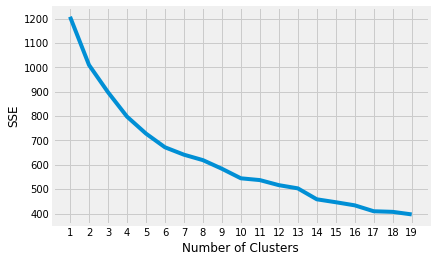

In [23]:
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()



In [24]:
kmeans = KMeans(n_clusters=10,  **kmeans_kwargs).fit(all_countries[cols_for_kmeans])
labels = kmeans.predict(all_countries[cols_for_kmeans])

# # get second to closest cluster per obs
# for ix,row in all_countries.iterrows():
#     point1 = (all_countries[all_countries.index == 'South Korea'])
#     print(kmeans.predict(point1))
#     l= {}
#     cnt = 0
#     for point2 in kmeans.cluster_centers_ : 
#         dist = np.linalg.norm(point1 - point2)
#         l[cnt] = dist
#         cnt = cnt+1
#     dist_df = pd.DataFrame.from_dict(l, orient = 'index', columns = ['distance'])
#     second_closest_label = dist_df.sort_values('distance').iloc[1]
#     all_countries.iloc[ix , 'second_closest'] = second_closest_label
all_countries['labels'] = labels

In [25]:
all_countries[all_countries.index.isin(['France','Poland',
                                       'Senegal','England'])]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,labels
0,,,,,,,,,,,,,,,
England,1.166667,0.916667,1.500000,0.750000,1.750000,0.666667,4.5,0.5,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
France,1.727273,1.363636,2.250000,0.875000,1.428571,0.714286,1.2,0.6,3.2,0.200000,0.200000,0.200000,0.200000,0.200000,1
Poland,0.636364,1.818182,1.428571,0.571429,1.400000,1.800000,3.0,1.0,2.0,1.000000,3.000000,0.500000,0.500000,0.500000,1
Senegal,1.000000,1.000000,1.000000,0.500000,0.600000,0.800000,3.0,1.0,0.5,0.666667,1.428571,0.285714,2.333333,0.333333,3


In [26]:

countries_specific_index_team_a = all_countries[all_countries['labels'] == 1].index
countries_specific_index_team_b = all_countries[all_countries['labels'] == 1].index

countries_specific_index_team_c = all_countries[all_countries['labels'] == 1].index
countries_specific_index_team_d = all_countries[all_countries['labels'] == 3].index



In [27]:

print('France : Poland')
print(all_teams[(all_teams['curr_team']=='France')&
          (all_teams['opp_team'].isin(countries_specific_index_team_a))][['curr_score','opp_score']].mean())

print(all_teams[(all_teams['curr_team']=='Poland')&
          (all_teams['opp_team'].isin(countries_specific_index_team_b))][['curr_score','opp_score']].mean())

print('########')
print('Senegal : England')
print(all_teams[(all_teams['curr_team']=='Senegal')&
          (all_teams['opp_team'].isin(countries_specific_index_team_c))][['curr_score','opp_score']].mean())

print(all_teams[(all_teams['curr_team']=='England')&
          (all_teams['opp_team'].isin(countries_specific_index_team_d))][['curr_score','opp_score']].mean())


France : Poland
curr_score    2.0
opp_score     1.6
dtype: float64
curr_score    1.0
opp_score     1.5
dtype: float64
########
Senegal : England
curr_score    0.333333
opp_score     1.000000
dtype: float64
curr_score    1.6
opp_score     1.2
dtype: float64


In [28]:
df[(df['home_team'] == 'Senegal')|(df['away_team'] == 'Senegal')]
all_teams[all_teams['curr_team']=='Senegal'].groupby('rank_opp_group').mean()

,rank_curr,rank_opp,curr_score,opp_score,rank_curr_group
rank_opp_group,,,,,
1.0,20.000000,3.000000,1.000000,1.000000,2.0
2.0,20.000000,23.500000,1.000000,0.500000,2.0
3.0,19.600000,40.200000,0.600000,0.800000,2.0
4.0,20.000000,60.000000,3.000000,1.000000,2.0
5.0,21.666667,70.666667,0.500000,0.666667,2.0
6.0,20.571429,84.428571,1.428571,0.285714,2.0
7.0,20.333333,94.000000,2.333333,0.333333,2.0


# Dimension Reduction for visualization

-0.902489447606487

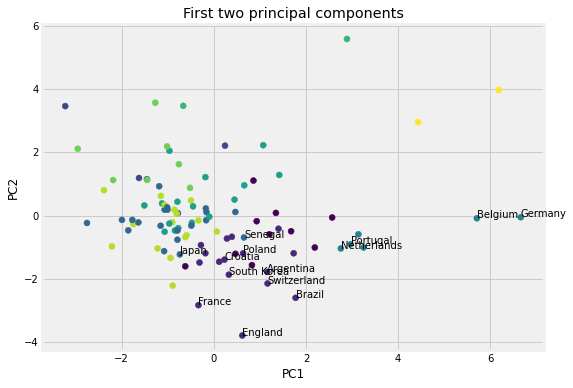

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

list_of_countries = ['Brazil','England','France','Germany','Belgium','Switzerland','Argentina',
                    'Senegal','Netherlands','Poland','Japan','Croatia','South Korea','Portugal']
sub_sample_for_anotation = all_countries[all_countries.index.isin(list_of_countries)]


pca = PCA(n_components = 2)
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(all_countries[cols_for_kmeans])
Xt_subsample = pca.transform(sub_sample_for_anotation[cols_for_kmeans])
plot = plt.scatter(Xt[:,0], Xt[:,1], c=all_countries['labels'])
for i in range(len(Xt_subsample)):
    plt.annotate(sub_sample_for_anotation.index[i], (Xt_subsample[i][0], Xt_subsample[i][1]))
  
# plt.legend(handles=plot.legend_elements()[0], labels=list(all_countries.index))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()